In [90]:
from __future__ import print_function

import os
import sys
# 使用insert 0即只使用github，避免交叉使用了pip安装的abupy，导致的版本不一致问题
sys.path.insert(0, os.path.abspath('../'))
import abupy
# 使用沙盒数据，目的是和书中一样的数据环境
abupy.env.enable_example_env_ipython()

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context(rc={'figure.figsize': (14, 7) } )
figzize_me = figsize =(14, 7)
# import warnings; warnings.simplefilter('ignore')

enable example env will only read RomDataBu/csv


In [91]:
print(sys.version)

3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]


# 第3章 量化工具-Numpy

[abu量化系统github地址](https://github.com/bbfamily/abu) (您的star是我的动力！)

[abu量化文档教程ipython notebook](https://github.com/bbfamily/abu/tree/master/abupy_lecture)

## 3.1 并行化思想与基础操作

### 3.1.1  并行化思想

In [92]:
# 如下方式引用numpy是numpy.org推荐的方式
import numpy as np

In [93]:
normal_list = range(10000)
%timeit [i**2 for i in normal_list]

100 loops, best of 3: 2.63 ms per loop


In [94]:
np_list = np.arange(10000)
%timeit np_list**2

The slowest run took 5.76 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 7.69 µs per loop


In [95]:
# 注意 * 3的操作被运行在每一个元素上
np_list = np.ones(5) * 3
print(np_list)
# 普通的列表把*3操作认为是整体性操作
normal_list = [1, 1, 1, 1, 1] * 3
normal_list, len(normal_list)

[ 3.  3.  3.  3.  3.]


([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 15)

### 3.1.2 初始化操作

In [96]:
# 100个0
np.zeros(100)
# shape：3行2列 全是0
np.zeros((3, 2))

# shape： 3行2列 全是1
np.ones((3, 2))
# shape：x=2, y=3, z=3 值随机
np.empty((2, 3, 3))

# 初始化序列与np_list一样的shape，值全为1
np.ones_like(np_list)
# 初始化序列与np_list一样的shape，值全为0
np.zeros_like(np_list)
# eye得到对角线全为1的单位矩阵
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [97]:
data = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr_np = np.array(data)
arr_np

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [98]:
np.linspace(0, 1, 10)

array([ 0.    ,  0.1111,  0.2222,  0.3333,  0.4444,  0.5556,  0.6667,
        0.7778,  0.8889,  1.    ])

In [99]:
# 200支股票
stock_cnt = 200
# 504个交易日
view_days = 504
# 生成服从正态分布：均值期望＝0，标准差＝1的序列
stock_day_change = np.random.standard_normal((stock_cnt, view_days))
# 使用沙盒数据，目的是和书中一样的数据环境，不需要注视掉
stock_day_change = np.load('../gen/stock_day_change.npy')
# 打印shape (200, 504) 200行504列
print(stock_day_change.shape)
# 打印出第一支只股票，头五个交易日的涨跌幅情况
print(stock_day_change[0:1, :5])

(200, 504)
[[ 0.3804  0.1226 -0.2852 -0.0089  0.4573]]


### 3.1.3 索引选取和切片选择

In [100]:
# 0:2第一，第二支股票，0:5头五个交易日的涨跌幅数据
stock_day_change[0:2, 0:5]

array([[ 0.3804,  0.1226, -0.2852, -0.0089,  0.4573],
       [ 0.1338, -0.4931,  1.447 , -1.0349,  0.423 ]])

In [101]:
# -2:倒数一，第二支股票，-5:最后五个交易日的涨跌幅数据
stock_day_change[-2:, -5:]

array([[ 0.2165, -0.0305, -0.7775, -1.1924, -0.0479],
       [-0.9638,  2.0349,  0.9934, -0.9239,  0.9693]])

In [102]:
# tmp = a
tmp = stock_day_change[0:2, 0:5].copy()
# a = b
stock_day_change[0:2, 0:5] = stock_day_change[-2:, -5:]
# b = tmp
stock_day_change[-2:, -5:] = tmp
# view result
stock_day_change[0:2, 0:5], stock_day_change[-2:, -5:]

(array([[ 0.2165, -0.0305, -0.7775, -1.1924, -0.0479],
        [-0.9638,  2.0349,  0.9934, -0.9239,  0.9693]]),
 array([[ 0.3804,  0.1226, -0.2852, -0.0089,  0.4573],
        [ 0.1338, -0.4931,  1.447 , -1.0349,  0.423 ]]))

### 3.1.4 数据转换与规整

In [103]:
print(stock_day_change[0:2, 0:5])
stock_day_change[0:2, 0:5].astype(int)

[[ 0.2165 -0.0305 -0.7775 -1.1924 -0.0479]
 [-0.9638  2.0349  0.9934 -0.9239  0.9693]]


array([[ 0,  0,  0, -1,  0],
       [ 0,  2,  0,  0,  0]])

In [104]:
# 2代表保留两位小数
np.around(stock_day_change[0:2, 0:5], 2)

array([[ 0.22, -0.03, -0.78, -1.19, -0.05],
       [-0.96,  2.03,  0.99, -0.92,  0.97]])

In [105]:
# 使用copy目的是不修改原始序列
tmp_test = stock_day_change[0:2, 0:5].copy()
# 将第一个元素改成nan
tmp_test[0][0] = np.nan
tmp_test

array([[    nan, -0.0305, -0.7775, -1.1924, -0.0479],
       [-0.9638,  2.0349,  0.9934, -0.9239,  0.9693]])

In [106]:
tmp_test = np.nan_to_num(tmp_test)
tmp_test

array([[ 0.    , -0.0305, -0.7775, -1.1924, -0.0479],
       [-0.9638,  2.0349,  0.9934, -0.9239,  0.9693]])

### 3.1.5 逻辑条件进行数据筛选

In [107]:
# 找出上述切片内涨幅超过0.5的股票时段, 通过输出结果你可以看到返回的是boolean的数组
mask = stock_day_change[0:2, 0:5] > 0.5
print(mask)

[[False False False False False]
 [False  True  True False  True]]


In [108]:
tmp_test = stock_day_change[0:2, 0:5].copy()
# 使用上述的mask数组筛选出符合条件的数组, 即中筛选mask中对应index值为True的
tmp_test[mask]

array([ 2.0349,  0.9934,  0.9693])

In [109]:
tmp_test[tmp_test > 0.5] = 1
tmp_test

array([[ 0.2165, -0.0305, -0.7775, -1.1924, -0.0479],
       [-0.9638,  1.    ,  1.    , -0.9239,  1.    ]])

In [110]:
tmp_test = stock_day_change[-2:, -5:]
print(tmp_test)
tmp_test[(tmp_test > 1) | (tmp_test < -1)]

[[ 0.3804  0.1226 -0.2852 -0.0089  0.4573]
 [ 0.1338 -0.4931  1.447  -1.0349  0.423 ]]


array([ 1.447 , -1.0349])

### 3.1.6 通用序列函数

In [111]:
# np.all判断序列中的所有元素是否全部是true, 即对bool序列进行与操作
# 本例实际判断stock_day_change[0:2, 0:5]中是否全是上涨的
np.all(stock_day_change[0:2, 0:5] > 0)

False

In [112]:
# np.any判断序列中是否有元素为true, 即对bool序列进行或操作
# 本例实际判断stock_day_change[0:2, 0:5]中是至少有一个是上涨的
np.any(stock_day_change[0:2, 0:5] > 0)

True

In [113]:
# 对两个序列对应的元素两两比较，maximum结果集取大,相对使用minimum为取小的结果集
np.maximum(stock_day_change[0:2, 0:5], stock_day_change[-2:, -5:])

array([[ 0.3804,  0.1226, -0.2852, -0.0089,  0.4573],
       [ 0.1338,  2.0349,  1.447 , -0.9239,  0.9693]])

In [114]:
change_int = stock_day_change[0:2, 0:5].astype(int)
print(change_int)
# 序列中数值值唯一且不重复的值组成新的序列
np.unique(change_int)

[[ 0  0  0 -1  0]
 [ 0  2  0  0  0]]


array([-1,  0,  2])

In [115]:
# axis＝1
np.diff(stock_day_change[0:2, 0:5])

array([[-0.2471, -0.7469, -0.4149,  1.1445],
       [ 2.9987, -1.0415, -1.9173,  1.8932]])

In [116]:
# 唯一区别 axis=0
np.diff(stock_day_change[0:2, 0:5], axis=0)

array([[-1.1803,  2.0654,  1.7709,  0.2684,  1.0172]])

In [117]:
tmp_test = stock_day_change[-2:, -5:]
print(np.where(tmp_test > 0.5, 1, 0))

[[0 0 0 0 0]
 [0 0 1 0 0]]


In [118]:
print(np.where(tmp_test > 0.5, 1, tmp_test))

[[ 0.3804  0.1226 -0.2852 -0.0089  0.4573]
 [ 0.1338 -0.4931  1.     -1.0349  0.423 ]]


In [119]:
# 序列中的值大于0.5并且小于1的赋值为1，否则赋值为0
np.where(np.logical_and(tmp_test > 0.5, tmp_test < 1), 1, 0)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [120]:
# 序列中的值大于0.5或者小于－0.5的赋值为1，否则赋值为0
np.where(np.logical_or(tmp_test > 0.5, tmp_test < -0.5), 1, 0)

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0]])

### 3.1.7  数据本地序列化操作

In [121]:
stock_day_change = np.load('../gen/stock_day_change.npy')

np.save('../gen/stock_day_change', stock_day_change)

stock_day_change.shape

(200, 504)

## 3.2 统计概念与函数使用

### 3.2.1 统计基础函数使用

In [122]:
stock_day_change_four = stock_day_change[:4, :4]
stock_day_change_four

array([[ 0.3804,  0.1226, -0.2852, -0.0089],
       [ 0.1338, -0.4931,  1.447 , -1.0349],
       [ 1.497 ,  1.1742,  0.2613,  0.7038],
       [-1.5701,  0.2527,  1.1458,  0.2931]])

In [123]:
print('最大涨幅 {}'.format(np.max(stock_day_change_four, axis=1)))

最大涨幅 [ 0.3804  1.447   1.497   1.1458]


In [124]:
print('最大跌幅 {}'.format(np.min(stock_day_change_four, axis=1)))
print('振幅幅度 {}'.format(np.std(stock_day_change_four, axis=1)))
print('平均涨跌 {}'.format(np.mean(stock_day_change_four, axis=1)))

最大跌幅 [-0.2852 -1.0349  0.2613 -1.5701]
振幅幅度 [ 0.2399  0.9254  0.4684  0.9905]
平均涨跌 [ 0.0522  0.0132  0.909   0.0304]


In [125]:
print('最大涨幅 {}'.format(np.max(stock_day_change_four, axis=0)))

最大涨幅 [ 1.497   1.1742  1.447   0.7038]


In [126]:
print('最大涨幅股票{}'.format(np.argmax(stock_day_change_four, axis=0)))

最大涨幅股票[2 2 1 2]


In [127]:
print('最大跌幅股票{}'.format(np.argmin(stock_day_change_four, axis=0)))

最大跌幅股票[3 1 0 1]


In [128]:
print('最大跌幅 {}'.format(np.min(stock_day_change_four, axis=0)))
print('振幅幅度 {}'.format(np.std(stock_day_change_four, axis=0)))
print('平均涨跌 {}'.format(np.mean(stock_day_change_four, axis=0)))

最大跌幅 [-1.5701 -0.4931 -0.2852 -1.0349]
振幅幅度 [ 1.0977  0.5962  0.6904  0.6426]
平均涨跌 [ 0.1102  0.2641  0.6422 -0.0117]


### 3.2.2  统计基础概念

In [129]:
a_investor = np.random.normal(loc=100, scale=50, size=(100, 1))
b_investor = np.random.normal(loc=100, scale=20, size=(100, 1))

In [130]:
# a交易者
print('a交易者期望{0:.2f}元, 标准差{1:.2f}, 方差{2:.2f}'.format(
    a_investor.mean(), a_investor.std(), a_investor.var()))

# b交易者
print('b交易者期望{0:.2f}元, 标准差{1:.2f}, 方差{2:.2f}'.format(
    b_investor.mean(), b_investor.std(), b_investor.var()))

a交易者期望112.77元, 标准差49.04, 方差2405.32
b交易者期望100.59元, 标准差19.37, 方差375.30


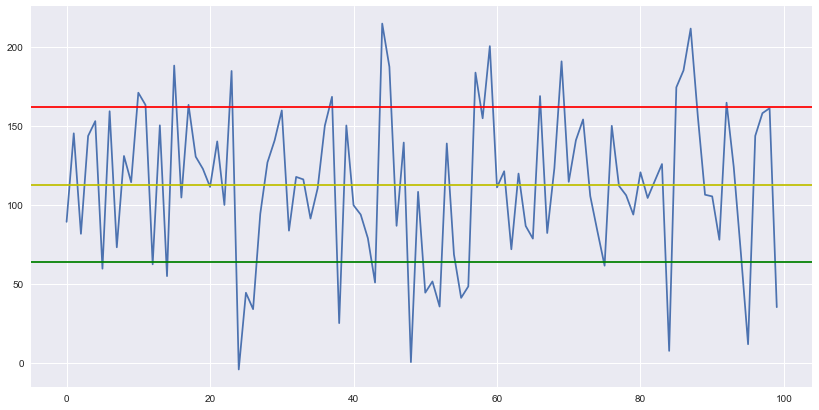

In [131]:
# a交易者期望
a_mean = a_investor.mean()
# a交易者标注差
a_std = a_investor.std()
# 收益绘制曲线
plt.plot(a_investor)
# 水平直线 上线
plt.axhline(a_mean + a_std, color='r')
# 水平直线 均值期望线
plt.axhline(a_mean, color='y')
# 水平直线 下线
plt.axhline(a_mean - a_std, color='g')

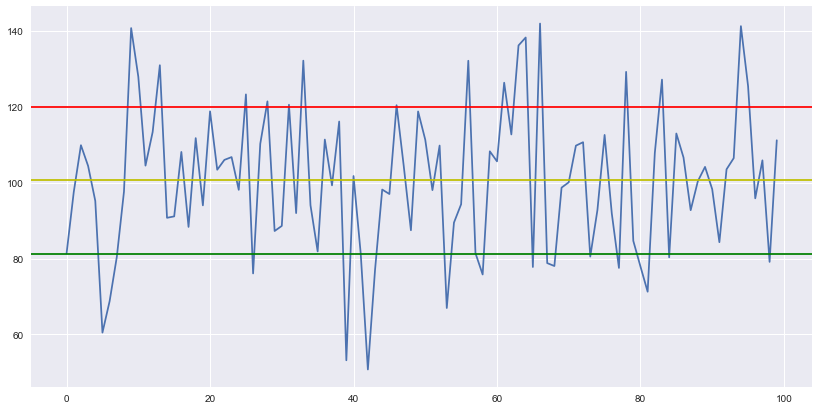

In [132]:
b_mean = b_investor.mean()
b_std = b_investor.std()
# b交易者收益绘制曲线
plt.plot(b_investor)
# 水平直线 上线
plt.axhline(b_mean + b_std, color='r')
# 水平直线 均值期望线
plt.axhline(b_mean, color='y')
# 水平直线 下线
plt.axhline(b_mean - b_std, color='g')

## 3.3  正态分布

### 3.3.1 正态分布基础概念

股票0 mean均值期望:-0.020
股票0 std振幅标准差:1.007


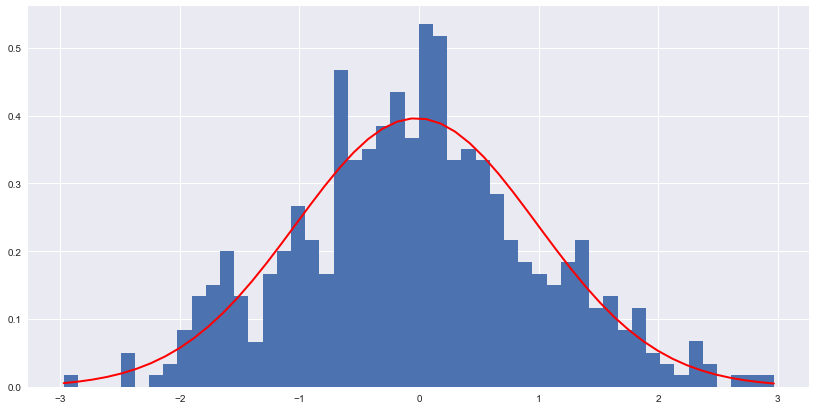

In [133]:
import scipy.stats as scs

# 均值期望
stock_mean = stock_day_change[0].mean()
# 标准差
stock_std = stock_day_change[0].std()
print('股票0 mean均值期望:{:.3f}'.format(stock_mean))
print('股票0 std振幅标准差:{:.3f}'.format(stock_std))

# 绘制股票0的直方图
plt.hist(stock_day_change[0], bins=50, normed=True)

# linspace从股票0 最小值－> 最大值生成数据
fit_linspace = np.linspace(stock_day_change[0].min(),
                           stock_day_change[0].max())

# 概率密度函数(PDF，probability density function)
# 由均值，方差，来描述曲线，使用scipy.stats.norm.pdf生成拟合曲线
pdf = scs.norm(stock_mean, stock_std).pdf(fit_linspace)
# plot x, y
plt.plot(fit_linspace, pdf, lw=2, c='r')

In [134]:
pdf

array([ 0.0054,  0.0077,  0.0107,  0.0146,  0.0198,  0.0264,  0.0346,
        0.0448,  0.0572,  0.072 ,  0.0893,  0.1091,  0.1314,  0.156 ,
        0.1825,  0.2105,  0.2392,  0.268 ,  0.2959,  0.3221,  0.3455,
        0.3653,  0.3806,  0.391 ,  0.3958,  0.3949,  0.3883,  0.3764,
        0.3596,  0.3386,  0.3142,  0.2874,  0.2591,  0.2302,  0.2016,
        0.174 ,  0.1481,  0.1242,  0.1026,  0.0836,  0.0671,  0.0531,
        0.0414,  0.0318,  0.0241,  0.018 ,  0.0133,  0.0096,  0.0069,
        0.0048])

### 3.3.2  实例1：正态分布买入策略

In [135]:
# 保留后50天的随机数据作为策略验证数据
keep_days = 50
# 统计前454, 切片切出0-454day，view_days = 504
stock_day_change_test = stock_day_change[:stock_cnt,
                        0:view_days - keep_days]
# 打印出前454跌幅最大的三支，总跌幅通过np.sum计算，np.sort对结果排序
print(np.sort(np.sum(stock_day_change_test, axis=1))[:3])
# 使用np.argsort针对股票跌幅进行排序，返回序号，即符合买入条件的股票序号
stock_lower_array = np.argsort(np.sum(stock_day_change_test, axis=1))[:3]
# 输符合买入条件的股票序号
stock_lower_array

[-63.3679 -58.8538 -45.3694]


array([109, 132,  53], dtype=int64)

In [136]:
def show_buy_lower(stock_ind):
    """
    :param stock_ind: 股票序号,即在stock_day_change中的位置
    :return:
    """
    # 设置一个一行两列的可视化图表
    _, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
    # view_days504 - keep_days50 = 454
    # 绘制前454天股票走势图，np.cumsum()：序列连续求和
    axs[0].plot(np.arange(0, view_days - keep_days),
                stock_day_change_test[stock_ind].cumsum())

    # [view_days504 - keep_days50 = 454 : view_days504]
    # 从第454天开始到504天的股票走势
    cs_buy = stock_day_change[stock_ind][
             view_days - keep_days:view_days].cumsum()

    # 绘制从第454天到504天股票走势图
    axs[1].plot(np.arange(view_days - keep_days, view_days), cs_buy)
    # 返回从第454天开始到第504天计算盈亏的盈亏序列的最后一个值
    return cs_buy[-1]

买入第 [109 132  53] 支股票，从第454个交易日开始持有盈亏:16.43%


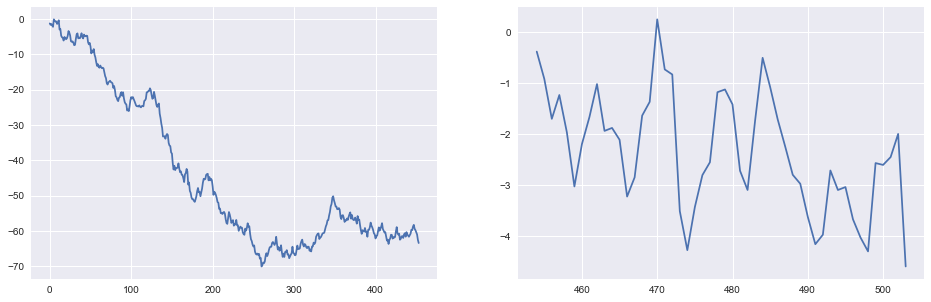

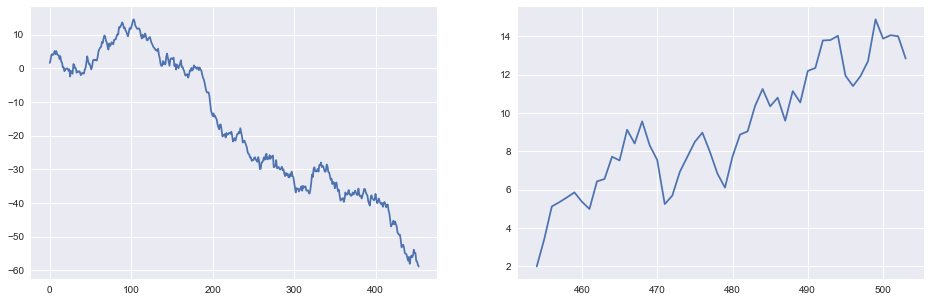

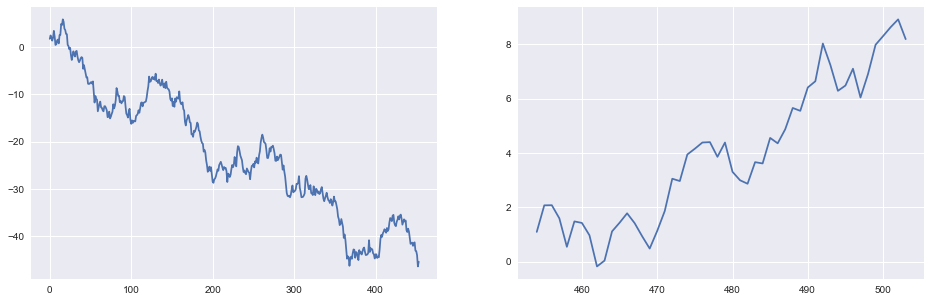

In [137]:
# 最后输出的盈亏比例
profit = 0
# 跌幅最大的三支遍历序号
for stock_ind in stock_lower_array:
    # profit即三支股票从第454天买入开始计算，直到最后一天的盈亏比例
    profit += show_buy_lower(stock_ind)

# str.format 支持{:.2f}形式保留两位小数
print('买入第 {} 支股票，从第454个交易日开始持有盈亏:{:.2f}%'.format(
    stock_lower_array, profit))

## 3.4 伯努利分布

### 3.4.1  伯努利分布概念

### 3.4.2 实例2：如何在交易中获取优势

In [138]:
# 设置100个赌徒
gamblers = 100

def casino(win_rate, win_once=1, loss_once=1, commission=0.01):
    """
        赌场：简单设定每个赌徒一共有1000000一共想在赌场玩10000000次，
        但是你要是没钱了也别想玩了
        win_rate:   输赢的概率
        win_once:   每次赢的钱数
        loss_once:  每次输的钱数
        commission: 手续费这里简单的设置了0.01 1%
    """
    my_money = 1000000
    play_cnt = 10000000
    commission = commission
    for _ in np.arange(0, play_cnt):
        # 使用伯努利分布根据win_rate来获取输赢
        w = np.random.binomial(1, win_rate)
        if w:
            # 赢了 +win_once
            my_money += win_once
        else:
            # 输了 -loss_once
            my_money -= loss_once
        # 手续费
        my_money -= commission
        if my_money <= 0:
            # 没钱就别玩了，不赊账
            break
    return my_money

In [139]:
# 如果有numba使用numba进行加速, 这个加速效果非常明显，不使用numba非常非常非常慢
import numba as nb
casino = nb.jit(casino)

In [140]:
# 100个赌徒进场天堂赌场，胜率0.5，赔率1，还没手续费
heaven_moneys = [casino(0.5, commission=0) for _ in
                 np.arange(0, gamblers)]

In [141]:
# 100个赌徒进场开始，胜率0.4，赔率1，没手续费
cheat_moneys = [casino(0.4, commission=0) for _ in
                np.arange(0, gamblers)]

In [142]:
# 100个赌徒进场开始，胜率0.5，赔率1，手续费0.01
commission_moneys = [casino(0.5, commission=0.01) for _ in
                     np.arange(0, gamblers)]

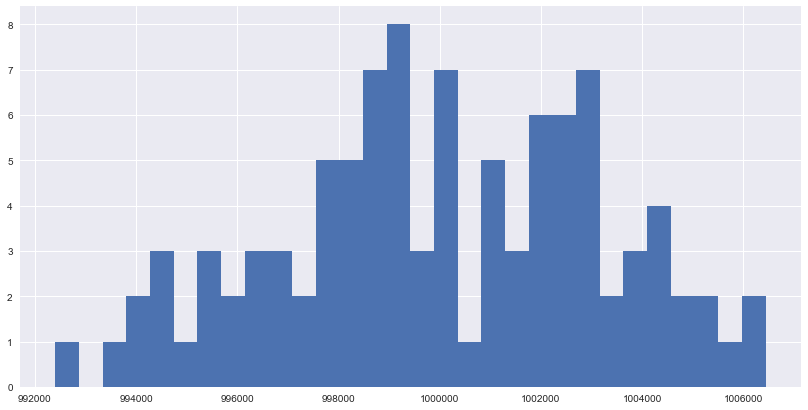

In [143]:
_ = plt.hist(heaven_moneys, bins=30)

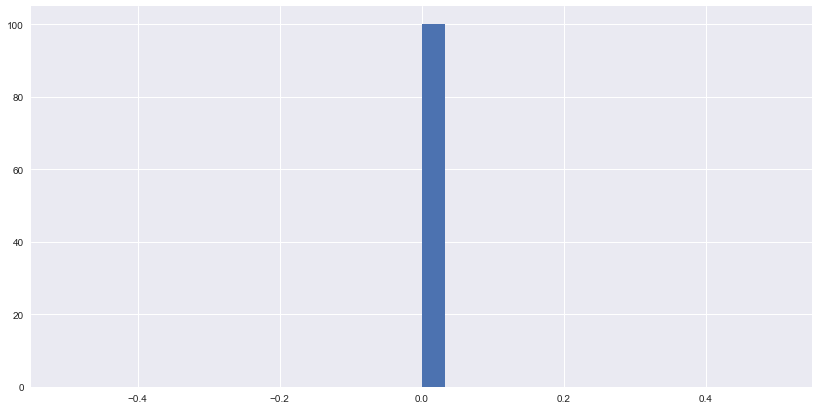

In [144]:
_ = plt.hist(cheat_moneys, bins=30)

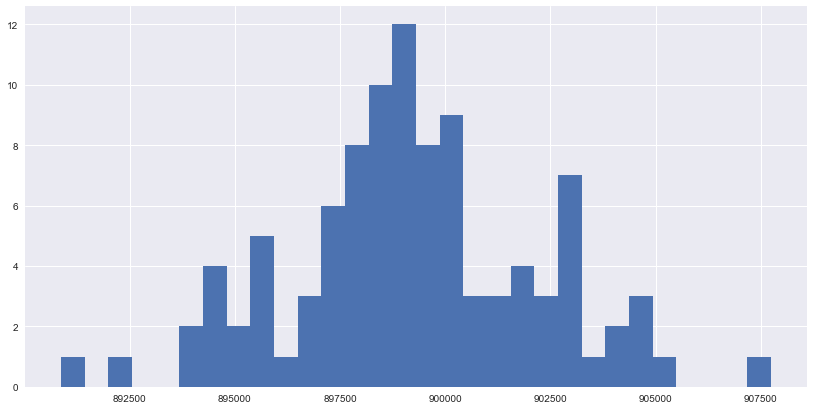

In [145]:
_ = plt.hist(commission_moneys, bins=30)

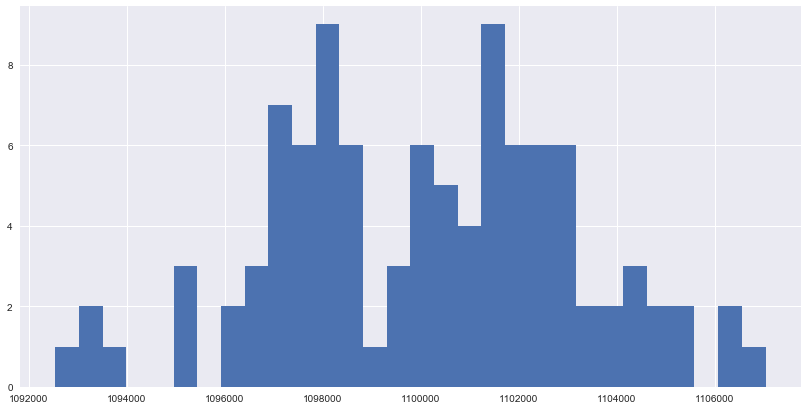

In [146]:
# 100个赌徒进场开始，胜率0.5，赔率1.04，手续费0.01
moneys = [casino(0.5, commission=0.01, win_once=1.02, loss_once=0.98)
          for _ in np.arange(0, gamblers)]

_ = plt.hist(moneys, bins=30)

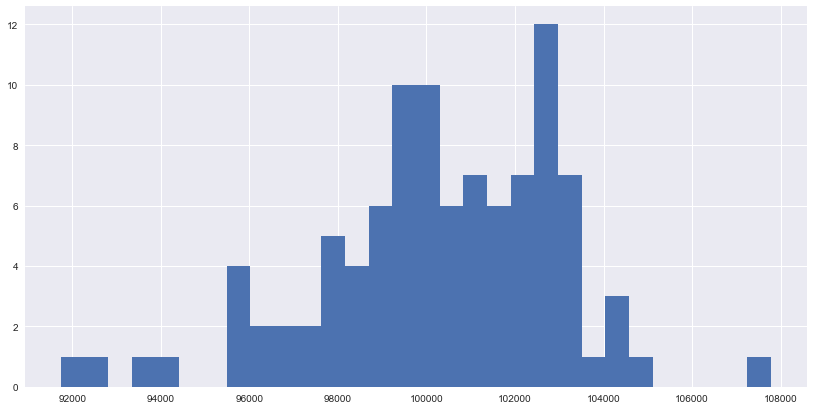

In [147]:
# 100个赌徒进场开始，胜率0.45，赔率1.04，手续费0.01
moneys = [casino(0.45, commission=0.01, win_once=1.02, loss_once=0.98)
          for _ in np.arange(0, gamblers)]

_ = plt.hist(moneys, bins=30)

In [148]:
import win32api,win32con
##提醒OK消息框
win32api.MessageBox(0, "运行完成", "提醒",win32con.MB_ICONWARNING)



1